# 差分进化算法 （DE算法）

## 算法简介

差分进化算法是基于种群的随机优化算法，它特别适合连续空间中的全局优化问题

## 算法基本原理

1. **初始化 ： 随机生成初始种群，就是随机生成解**

2. **变异 ： 通过向量差创建变异个体** 

什么是向量差？ 向量差就是两个向量做减法，表示了两个解之间的差异，当种群不断收敛的时候，向量差会变小，表示搜索会逐渐精细化

在变异操作中，其数学表达式其实可以表示为：

在 DE 算法的变异操作中：
V_i = X_r1 + F * (X_r2 - X_r3)

X_r2 - X_r3 是向量差，提供了搜索方向
F 是缩放因子，控制了沿这个方向移动的步长
X_r1 是基向量，提供了起始位置
整个操作可以理解为："从位置 X_r1 出发，沿着 X_r2 到 X_r3 的方向，移动 F 倍的距离"

3. **交叉 ：将变异个体与目标个体进行交叉产生试验个体**

目标个体 ： 目标个体就是当前正在处理的解，等待被改进的对象
交叉操作具体指的就是使用一定的交换策略，从目标个体和变异个体中选取向量每个维度的值

4.**选择：比较试验个体与目标个体，保留更优的一个**

选择就是通过计算目标个体和试验个体分别的适应度，通过比较他们的适应度差别，来保留更加优秀的个体


In [8]:
# 设置字体
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 设置中文字体，这里使用微软雅黑作为例子
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  
# 解决负号显示问题
plt.rcParams['axes.unicode_minus'] = False  

In [1]:
#导入基本的库

import numpy as np
import matplotlib.pyplot as plt

## 代码实现部分

### 初始化部分：随机生成初始种群，计算每个个体的适应度

In [2]:
x = np.zeros((10, 3))

x


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [3]:
def __init__(self, fitness_func, bounds, pop_size=50, F=0.5, CR=0.7, max_iter=100):
    """
    初始化差分进化算法
    
    参数:
        fitness_func: 适应度函数（目标函数）
        bounds: 参数边界，形式为[(x1_min, x1_max), (x2_min, x2_max), ...]
        pop_size: 种群大小
        F: 缩放因子
        CR: 交叉概率
        max_iter: 最大迭代次数
    """
    self.fitness_func = fitness_func
    self.bounds = bounds
    self.pop_size = pop_size
    self.F = F
    self.CR = CR
    self.max_iter = max_iter
    self.dim = len(bounds)
    
    # 初始化种群 - 在每个维度的边界范围内随机生成个体

    #创建一个行数为种群数量，列数为维度的矩阵，代表了种群
    self.population = np.zeros((pop_size, self.dim))
    for i in range(self.dim):
        self.population[:, i] = np.random.uniform(
            bounds[i][0], bounds[i][1], size=pop_size)
    
    # 计算初始种群的适应度
    self.fitness = np.array([self.fitness_func(ind) for ind in self.population])
    
    # 找到适应度最小的个体索引
    self.best_idx = np.argmin(self.fitness)
    #找到当前最优个体
    self.best_solution = self.population[self.best_idx].copy()
    #找到最优适应度
    self.best_fitness = self.fitness[self.best_idx]
    
    # 记录每代的最优适应度
    self.fitness_history = [self.best_fitness]

### 变异操作：V_i = X_r1 + F * (X_r2 - X_r3)

In [4]:
# 变异

# 在种群中随机选择三个不同于当前个体的个体
idxs = [idx for idx in range(self.pop_size) if idx != i]
a, b, c = np.random.choice(idxs, 3, replace=False)

# 创建变异向量
mutant = self.population[a] + self.F * (self.population[b] - self.population[c])

# 确保变异向量在边界内
for j in range(self.dim):
    if mutant[j] < self.bounds[j][0]:
        mutant[j] = self.bounds[j][0]
    if mutant[j] > self.bounds[j][1]:
        mutant[j] = self.bounds[j][1]

NameError: name 'self' is not defined

### 交叉操作 ：将变异个体与目标个体进行信息交换

In [ ]:
# 交叉
trial = np.copy(self.population[i])  # 从目标个体复制
j_rand = np.random.randint(0, self.dim)  # 确保至少有一个维度发生变化
#当随机数小于交叉概率或者是j = j_rand 的时候，进行交叉
for j in range(self.dim):
    if np.random.random() < self.CR or j == j_rand:
        trial[j] = mutant[j]  # 从变异个体继承

### 选择操作 ：比较试验个体与目标个体的适应度，保留更优的一个进入下一代

In [ ]:
# 选择
f = self.fitness_func(trial)  # 计算试验个体的适应度
if f < self.fitness[i]:  # 如果试验个体更优
    self.population[i] = trial  # 替换目标个体
    self.fitness[i] = f
    
    # 更新全局最优解
    if f < self.best_fitness:
        self.best_solution = trial.copy()
        self.best_fitness = f

### 可视化操作：横轴为迭代次数，纵轴为每次迭代的最优适应度

In [5]:
def plot_fitness_history(self):
    """绘制适应度历史曲线"""
    plt.figure(figsize=(10, 6))
    # 设置中文字体
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
    plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
    
    plt.plot(self.fitness_history)
    plt.title('适应度进化曲线')
    plt.xlabel('迭代次数')
    plt.ylabel('最优适应度值')
    plt.grid(True)
    plt.show()

### 总的代码实现

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 差分进化算法类
class DifferentialEvolution:
    def __init__(self, fitness_func, bounds, pop_size=50, F=0.5, CR=0.7, max_iter=100):
        """
        初始化差分进化算法
        
        参数:
            fitness_func: 适应度函数（目标函数）
            bounds: 参数边界，形式为[(x1_min, x1_max), (x2_min, x2_max), ...]
            pop_size: 种群大小
            F: 缩放因子
            CR: 交叉概率
            max_iter: 最大迭代次数
        """
        self.fitness_func = fitness_func
        self.bounds = bounds
        self.pop_size = pop_size
        self.F = F
        self.CR = CR
        self.max_iter = max_iter
        self.dim = len(bounds)
        
        # 初始化种群
        self.population = np.zeros((pop_size, self.dim))
        for i in range(self.dim):
            self.population[:, i] = np.random.uniform(
                bounds[i][0], bounds[i][1], size=pop_size)
        
        # 计算初始种群的适应度
        self.fitness = np.array([self.fitness_func(ind) for ind in self.population])
        
        # 记录最优解
        self.best_idx = np.argmin(self.fitness)
        self.best_solution = self.population[self.best_idx].copy()
        self.best_fitness = self.fitness[self.best_idx]
        
        # 记录每代的最优适应度
        self.fitness_history = [self.best_fitness]
    
    def evolve(self):
        """执行进化过程"""
        for _ in range(self.max_iter):
            for i in range(self.pop_size):
                # 变异
                # 随机选择三个不同于当前个体的个体
                idxs = [idx for idx in range(self.pop_size) if idx != i]
                a, b, c = np.random.choice(idxs, 3, replace=False)
                
                # 创建变异向量
                mutant = self.population[a] + self.F * (self.population[b] - self.population[c])
                
                # 确保变异向量在边界内
                for j in range(self.dim):
                    if mutant[j] < self.bounds[j][0]:
                        mutant[j] = self.bounds[j][0]
                    if mutant[j] > self.bounds[j][1]:
                        mutant[j] = self.bounds[j][1]
                
                # 交叉
                trial = np.copy(self.population[i])
                j_rand = np.random.randint(0, self.dim)
                for j in range(self.dim):
                    if np.random.random() < self.CR or j == j_rand:
                        trial[j] = mutant[j]
                
                # 选择
                f = self.fitness_func(trial)
                if f < self.fitness[i]:
                    self.population[i] = trial
                    self.fitness[i] = f
                    
                    # 更新全局最优解
                    if f < self.best_fitness:
                        self.best_solution = trial.copy()
                        self.best_fitness = f
            
            # 记录当前代的最优适应度
            self.fitness_history.append(self.best_fitness)
        
        return self.best_solution, self.best_fitness
    
    def plot_fitness_history(self):
        """绘制适应度历史曲线"""
        plt.figure(figsize=(10, 6))
        plt.plot(self.fitness_history)
        plt.title('适应度进化曲线')
        plt.xlabel('迭代次数')
        plt.ylabel('最优适应度值')
        plt.grid(True)
        plt.show()

最优解: [-0.4999955  -0.49999986 -0.50001453 -0.49999284 -0.50001451]
最优适应度值: -1.2499999995066513


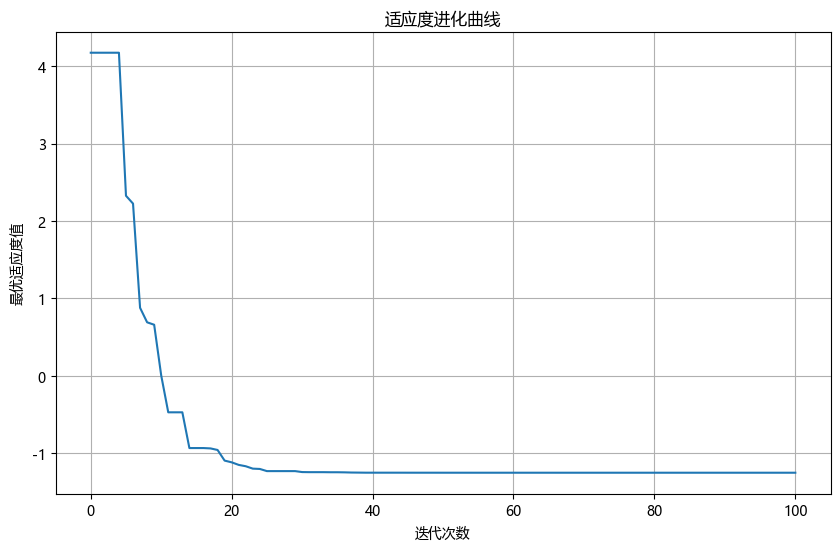

In [10]:
# 测试函数：Sphere函数
def sphere(x):
    return np.sum(x**2)

# 测试DE算法
if __name__ == "__main__":
    # 定义问题边界（5维问题，每维的范围是[-5.12, 5.12]）
    bounds = [(-5.12, 5.12)] * 5
    
    # 创建DE优化器
    de = DifferentialEvolution(sphere, bounds, pop_size=50, F=0.5, CR=0.7, max_iter=100)
    
    # 执行优化
    solution, fitness = de.evolve()
    
    print(f"最优解: {solution}")
    print(f"最优适应度值: {fitness}")
    
    # 绘制适应度历史
    de.plot_fitness_history()

## 和ga算法的比较

和GA算法的不同 ：

de算法编码只能使用实数编码，ga算法可以使用实数编码也可以使用二进制编码

de算法适用于组合优化问题，ga更加适用与连续优化问题

核心的差别在于变异机制：

de算法的变异机制是 ： V = X_r1 + F × (X_r2 - X_r3)

ga算法的变异机制是：按照变异率，来按照一定几率为个体的基因发生变异

## DE算法处理约束的方式

使用惩罚函数处理约束 ：

传统的方式是通过将目标函数和惩罚函数合并为一个函数 ： F(x) = f(x) + r * P(x)

一种优化的方式是通过使用约束违反度来决定哪个解更优 ： 
三种情况 ： 1. 两个解的惩罚值都为 0 ，则选择适应度更好的 
           2. 存在某一个解惩罚值不为0，则选择惩罚值为0的
           3. 两个惩罚值都不为0，选择惩罚值较小的

其他优化方式 ： 为不同的约束设置权重/ 允许轻微违反约束，只有超过容忍度的违反才计算


迭代 50/500, 最优适应度: 6899.6898, 约束违反: 0.0000, 可行解数量: 100/100
迭代 100/500, 最优适应度: 6099.9336, 约束违反: 0.0000, 可行解数量: 100/100
迭代 150/500, 最优适应度: 6059.7890, 约束违反: 0.0000, 可行解数量: 100/100
迭代 200/500, 最优适应度: 6059.7143, 约束违反: 0.0000, 可行解数量: 100/100
迭代 250/500, 最优适应度: 6059.7143, 约束违反: 0.0000, 可行解数量: 100/100
迭代 300/500, 最优适应度: 6059.7143, 约束违反: 0.0000, 可行解数量: 100/100
迭代 350/500, 最优适应度: 6059.7143, 约束违反: 0.0000, 可行解数量: 100/100
迭代 400/500, 最优适应度: 6059.7143, 约束违反: 0.0000, 可行解数量: 100/100
迭代 450/500, 最优适应度: 6059.7143, 约束违反: 0.0000, 可行解数量: 100/100
迭代 500/500, 最优适应度: 6059.7143, 约束违反: 0.0000, 可行解数量: 100/100
优化完成，耗时: 3.53秒

优化结果:
圆柱体壁厚 (x₁): 0.812500
端盖壁厚 (x₂): 0.437500
圆柱体内径 (x₃): 42.098446
圆柱体长度 (x₄): 176.636596
最小成本: 6059.714335
约束违反: 0.000000

约束检查:
约束1: 0.000000 ✓
约束2: -0.035881 ✓
约束3: 0.000000 ✓
约束4: -63.363404 ✓


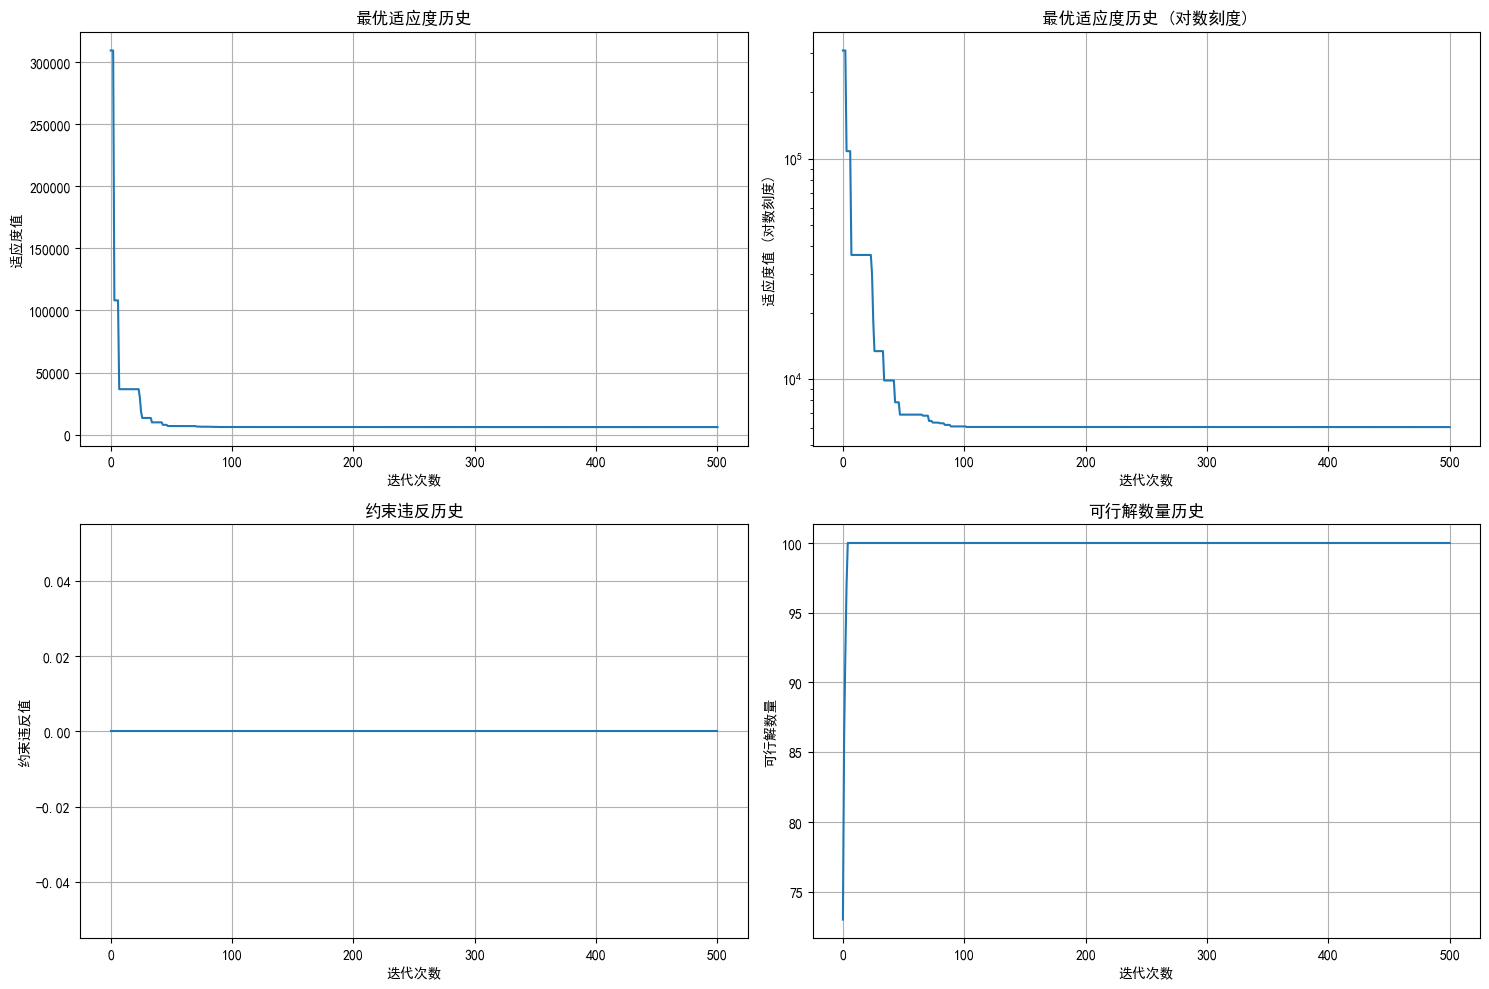

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import time

class DifferentialEvolution:
    def __init__(self, fitness_func, bounds, constraint_funcs=None, pop_size=50, F=0.5, CR=0.7, max_iter=200):
        """
        初始化差分进化算法
        
        参数:
            fitness_func: 适应度函数（目标函数）
            bounds: 参数边界，形式为[(x1_min, x1_max), (x2_min, x2_max), ...]
            constraint_funcs: 约束函数列表，每个函数应返回一个值，<=0表示约束满足
            pop_size: 种群大小
            F: 缩放因子
            CR: 交叉概率
            max_iter: 最大迭代次数
        """
        self.fitness_func = fitness_func
        self.bounds = bounds
        self.constraint_funcs = constraint_funcs if constraint_funcs else []
        self.pop_size = pop_size
        self.F = F
        self.CR = CR
        self.max_iter = max_iter
        self.dim = len(bounds)
        
        # 初始化种群
        self.population = np.zeros((pop_size, self.dim))
        for i in range(self.dim):
            self.population[:, i] = np.random.uniform(
                bounds[i][0], bounds[i][1], size=pop_size)
        
        # 处理特殊约束：x1和x2必须是0.0625的倍数
        if self.dim >= 2:  # 确保至少有两个维度
            self.population[:, 0] = np.round(self.population[:, 0] / 0.0625) * 0.0625
            self.population[:, 1] = np.round(self.population[:, 1] / 0.0625) * 0.0625
        
        # 计算初始种群的适应度和约束违反程度
        self.fitness, self.constraint_violation = self.evaluate_population(self.population)
        
        # 记录最优解
        self.best_idx = self.get_best_index()
        self.best_solution = self.population[self.best_idx].copy()
        self.best_fitness = self.fitness[self.best_idx]
        self.best_violation = self.constraint_violation[self.best_idx]
        
        # 记录每代的最优适应度和约束违反
        self.fitness_history = [self.best_fitness]
        self.violation_history = [self.best_violation]
        self.feasible_solutions_history = [np.sum(self.constraint_violation == 0)]
    
    def evaluate_population(self, population):
        """评估种群的适应度和约束违反程度"""
        fitness = np.array([self.fitness_func(ind) for ind in population])
        
        # 计算约束违反程度
        if self.constraint_funcs:
            violation = np.zeros(len(population))
            for i, ind in enumerate(population):
                v = 0
                for constraint_func in self.constraint_funcs:
                    c = constraint_func(ind)
                    if c > 0:  # 约束被违反
                        v += c
                violation[i] = v
        else:
            violation = np.zeros(len(population))
            
        return fitness, violation
    
    def get_best_index(self):
        """获取最优个体的索引，考虑约束"""
        # 首先检查是否有可行解
        feasible = self.constraint_violation == 0
        if np.any(feasible):
            # 在可行解中找最优
            feasible_idx = np.where(feasible)[0]
            return feasible_idx[np.argmin(self.fitness[feasible_idx])]
        else:
            # 如果没有可行解，选择违反约束最小的
            return np.argmin(self.constraint_violation)
    
    def evolve(self):
        """执行进化过程"""
        start_time = time.time()
        
        for iteration in range(self.max_iter):
            for i in range(self.pop_size):
                # 变异
                idxs = [idx for idx in range(self.pop_size) if idx != i]
                a, b, c = np.random.choice(idxs, 3, replace=False)
                
                # 创建变异向量
                mutant = self.population[a] + self.F * (self.population[b] - self.population[c])
                
                # 确保变异向量在边界内
                for j in range(self.dim):
                    if mutant[j] < self.bounds[j][0]:
                        mutant[j] = self.bounds[j][0]
                    if mutant[j] > self.bounds[j][1]:
                        mutant[j] = self.bounds[j][1]
                
                # 处理特殊约束：x1和x2必须是0.0625的倍数
                if self.dim >= 2:  # 确保至少有两个维度
                    mutant[0] = np.round(mutant[0] / 0.0625) * 0.0625
                    mutant[1] = np.round(mutant[1] / 0.0625) * 0.0625
                
                # 交叉
                trial = np.copy(self.population[i])
                j_rand = np.random.randint(0, self.dim)
                for j in range(self.dim):
                    if np.random.random() < self.CR or j == j_rand:
                        trial[j] = mutant[j]
                
                # 评估试验向量
                f_trial, v_trial = self.evaluate_population(trial.reshape(1, -1))
                f_trial, v_trial = f_trial[0], v_trial[0]
                
                # 选择
                replace = False
                
                # 如果两个解都可行，选择适应度更好的
                if v_trial == 0 and self.constraint_violation[i] == 0:
                    if f_trial < self.fitness[i]:
                        replace = True
                # 如果试验解可行但当前解不可行，选择试验解
                elif v_trial == 0 and self.constraint_violation[i] > 0:
                    replace = True
                # 如果两个解都不可行，选择违反约束较小的
                elif v_trial > 0 and self.constraint_violation[i] > 0:
                    if v_trial < self.constraint_violation[i]:
                        replace = True
                
                if replace:
                    self.population[i] = trial
                    self.fitness[i] = f_trial
                    self.constraint_violation[i] = v_trial
            
            # 更新最优解
            best_idx = self.get_best_index()
            if (self.constraint_violation[best_idx] < self.best_violation or 
                (self.constraint_violation[best_idx] == 0 and 
                 self.best_violation == 0 and 
                 self.fitness[best_idx] < self.best_fitness)):
                self.best_solution = self.population[best_idx].copy()
                self.best_fitness = self.fitness[best_idx]
                self.best_violation = self.constraint_violation[best_idx]
            
            # 记录历史
            self.fitness_history.append(self.best_fitness)
            self.violation_history.append(self.best_violation)
            self.feasible_solutions_history.append(np.sum(self.constraint_violation == 0))
            
            # 每50代打印一次进度
            if (iteration + 1) % 50 == 0:
                feasible_count = np.sum(self.constraint_violation == 0)
                print(f"迭代 {iteration + 1}/{self.max_iter}, 最优适应度: {self.best_fitness:.4f}, "
                      f"约束违反: {self.best_violation:.4f}, 可行解数量: {feasible_count}/{self.pop_size}")
        
        end_time = time.time()
        print(f"优化完成，耗时: {end_time - start_time:.2f}秒")
        
        return self.best_solution, self.best_fitness, self.best_violation
    
    def plot_convergence(self):
        """绘制收敛曲线"""
        plt.figure(figsize=(15, 10))
        
        # 设置中文字体
        plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
        plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
        
        # 绘制适应度历史
        plt.subplot(2, 2, 1)
        plt.plot(self.fitness_history)
        plt.title('最优适应度历史')
        plt.xlabel('迭代次数')
        plt.ylabel('适应度值')
        plt.grid(True)
        
        # 使用对数刻度
        plt.subplot(2, 2, 2)
        plt.semilogy(self.fitness_history)
        plt.title('最优适应度历史 (对数刻度)')
        plt.xlabel('迭代次数')
        plt.ylabel('适应度值 (对数刻度)')
        plt.grid(True)
        
        # 绘制约束违反历史
        plt.subplot(2, 2, 3)
        plt.plot(self.violation_history)
        plt.title('约束违反历史')
        plt.xlabel('迭代次数')
        plt.ylabel('约束违反值')
        plt.grid(True)
        
        # 绘制可行解数量历史
        plt.subplot(2, 2, 4)
        plt.plot(self.feasible_solutions_history)
        plt.title('可行解数量历史')
        plt.xlabel('迭代次数')
        plt.ylabel('可行解数量')
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()

# 定义压力容器问题的目标函数
def pressure_vessel_cost(x):
    """
    压力容器设计的成本函数
    x = [x1, x2, x3, x4] 分别是圆柱体壁厚、端盖壁厚、圆柱体内径、圆柱体长度
    """
    x1, x2, x3, x4 = x
    return 0.6224 * x1 * x3 * x4 + 1.7781 * x2 * x3**2 + 3.1661 * x1**2 * x4 + 19.84 * x1**2 * x3

# 定义约束函数
def constraint1(x):
    """约束1: -x1 + 0.0193*x3 <= 0"""
    return -x[0] + 0.0193 * x[2]

def constraint2(x):
    """约束2: -x2 + 0.00954*x3 <= 0"""
    return -x[1] + 0.00954 * x[2]

def constraint3(x):
    """约束3: -π*x3^2*x4 - 4π*x3^3/3 + 1296000 <= 0"""
    return -np.pi * x[2]**2 * x[3] - 4 * np.pi * x[2]**3 / 3 + 1296000

def constraint4(x):
    """约束4: x4 - 240 <= 0"""
    return x[3] - 240

# 主函数
if __name__ == "__main__":
    # 设置问题参数
    bounds = [(0.0625, 99), (0.0625, 99), (10, 200), (10, 200)]
    constraints = [constraint1, constraint2, constraint3, constraint4]
    
    # 创建DE优化器
    de = DifferentialEvolution(
        pressure_vessel_cost, 
        bounds, 
        constraints, 
        pop_size=100,  # 较大的种群有助于找到可行解
        F=0.7,         # 较大的F值增强全局搜索能力
        CR=0.9,        # 较高的交叉率有助于探索新解
        max_iter=500   # 足够的迭代次数确保收敛
    )
    
    # 执行优化
    best_solution, best_fitness, best_violation = de.evolve()
    
    # 输出结果
    print("\n优化结果:")
    print(f"圆柱体壁厚 (x₁): {best_solution[0]:.6f}")
    print(f"端盖壁厚 (x₂): {best_solution[1]:.6f}")
    print(f"圆柱体内径 (x₃): {best_solution[2]:.6f}")
    print(f"圆柱体长度 (x₄): {best_solution[3]:.6f}")
    print(f"最小成本: {best_fitness:.6f}")
    print(f"约束违反: {best_violation:.6f}")
    
    # 检查约束
    print("\n约束检查:")
    print(f"约束1: {constraint1(best_solution):.6f} {'✓' if constraint1(best_solution) <= 0 else '✗'}")
    print(f"约束2: {constraint2(best_solution):.6f} {'✓' if constraint2(best_solution) <= 0 else '✗'}")
    print(f"约束3: {constraint3(best_solution):.6f} {'✓' if constraint3(best_solution) <= 0 else '✗'}")
    print(f"约束4: {constraint4(best_solution):.6f} {'✓' if constraint4(best_solution) <= 0 else '✗'}")
    
    # 绘制收敛曲线
    de.plot_convergence()